# Import Libraries

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter 
import nltk 
import re 
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
!pip install WordCloud

                                              0.0/300.2 kB ? eta -:--:--
     ----------------------------           225.3/300.2 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MR-
[nltk_data]     AWUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MR-
[nltk_data]     AWUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\MR-
[nltk_data]     AWUD\AppData\Roaming\nltk_data...


True

# Read Dataset

In [3]:
df=pd.read_csv('E:/Dataset/twitter_data.csv', encoding = 'latin',
                names = ['Label', 'ID','Date', 'Query', 'Username', 'Text'])
df.head()

,Label,ID,Date,Query,Username,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Label     1600000 non-null  int64 
 1   ID        1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Query     1600000 non-null  object
 4   Username  1600000 non-null  object
 5   Text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df=df.sample(frac=1)
df = df[:20000]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 943863 to 834761
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     20000 non-null  int64 
 1   ID        20000 non-null  int64 
 2   Date      20000 non-null  object
 3   Query     20000 non-null  object
 4   Username  20000 non-null  object
 5   Text      20000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [8]:
df['Label'].unique()

array([4, 0], dtype=int64)

In [9]:
#replace 4 ---> 1 
df['Label']=df['Label'].replace(4,1)

In [11]:
df['Label'].unique()

array([1, 0], dtype=int64)

In [12]:
df['Label'].value_counts()

0    10009
1     9991
Name: Label, dtype: int64

In [14]:
# get common words in data 
all_words=[]
for line in list (df['Text']):
    words = line.split()
    for word in words:
        if len(word)>2:
            all_words.append(word.lower()) # run Run 

In [17]:
Counter(all_words).most_common(30)

[('the', 6570),
 ('and', 3709),
 ('you', 2939),
 ('for', 2616),
 ('have', 1763),
 ('but', 1614),
 ("i'm", 1583),
 ('that', 1570),
 ('just', 1529),
 ('with', 1481),
 ('was', 1291),
 ('not', 1273),
 ('this', 1107),
 ('get', 983),
 ('are', 956),
 ('good', 924),
 ('all', 893),
 ('like', 884),
 ('out', 870),
 ("it's", 816),
 ('going', 801),
 ('now', 800),
 ('your', 795),
 ('day', 777),
 ('got', 769),
 ('love', 761),
 ('back', 681),
 ('from', 669),
 ('will', 656),
 ('what', 655)]

# Data Preprocessing 

In [19]:
df.drop(['Date','ID','Query','Username'],axis=1,inplace=True)

In [20]:
df.head()

,Label,Text
943863,1,angels and demons? more like mortals running a...
917801,1,One for the Mum's - HAPPY MOTHERS DAY! &amp; a...
136037,0,@TheGadgetShow update on the free falling ipho...
1027850,1,I love the movie &quot;Stardust&quot;! I sugg...
300617,0,Watching jon and kate plus 8...I need some hel...


In [21]:
# object ---> string
df['Text']=df['Text'].astype('str')

In [49]:
url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
user_pattern = '@[^\s]+'

In [29]:
#stop_words 
stop_words=set(stopwords.words('English'))
print(stop_words)

{'out', 'doesn', 'so', "isn't", 'whom', 'further', 'needn', 'd', 'wasn', 'as', 'a', 'ain', 'again', 'myself', 'both', 'theirs', 'did', "she's", 'by', 'with', 'through', "should've", 'hadn', 'which', 'yourself', 'yours', 'most', 'now', 'couldn', 'being', 'because', 'between', 'same', 'when', 'nor', 'ourselves', "weren't", 'wouldn', 'while', 'down', 'm', 'isn', 'mightn', 'him', 'here', 'hasn', 'why', "haven't", 'doing', 'there', 'under', 'aren', "you'll", 'our', 'no', 'after', 'any', 'then', "shouldn't", 'won', 'her', 'of', "didn't", "hasn't", 'for', 'themselves', 'i', 'about', 'just', 'an', 'into', 'during', 'up', 'on', "needn't", 'what', 'some', 'weren', "wouldn't", 's', 'this', 'do', 'more', 'the', 'your', 'has', "you'd", 'have', 'shan', 'we', 'y', 'can', "shan't", 'if', 'other', 'to', 'and', 't', 'is', 'their', 'having', 'very', 'were', 'over', "you've", "that'll", 'are', 'above', 'at', 'below', 're', 'was', "hadn't", 'will', 'than', 'all', "you're", 'his', 'few', 'be', "won't", 'don

In [50]:
def Text_preprocessing (Text):
    # 1_convert upper case to lower case  
    Text = Text.lower()
    
    #2- remove URLS (https/http/www)
    Text = re.sub(url_pattern,'',Text)

    #3-remove @
    Text = re.sub(user_pattern,'',Text)
    
    #4- remove punctuation 
    Text=Text.translate(str.maketrans("", "",string.punctuation))

    #5-perform tokenization ( sentence----words)
    tokens = word_tokenize(Text)

    #6- remove stop words (the , and , on , at ,in ,.....)
    final_tokens=[w for w in tokens if w not in  stop_words]

    #7- perform lematization # runninr --> run  Engineering---> Engineer   wolves ---wolf
    word_limmatizer=WordNetLemmatizer()
    final_text=[]
    for token in final_tokens:
        if len(token) > 2 :
            word = word_limmatizer.lemmatize(token)
            final_text.append(word)

    return ' '.join(final_text)

In [53]:
# call function 
df['Cleaned_Text']=df['Text'].apply(lambda x: Text_preprocessing(x))
print('Text_preprocessing Done..')

Text_preprocessing Done..


In [52]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\MR-
[nltk_data]     AWUD\AppData\Roaming\nltk_data...


True

In [54]:
df.head()

,Label,Text,Cleaned_Text
943863,1,angels and demons? more like mortals running a...,angel demon like mortal running interesting
917801,1,One for the Mum's - HAPPY MOTHERS DAY! &amp; a...,one mum happy mother day amp special mention o...
136037,0,@TheGadgetShow update on the free falling ipho...,update free falling iphone home button scarily...
1027850,1,I love the movie &quot;Stardust&quot;! I sugg...,love movie quotstardustquot suggest everyone c...
300617,0,Watching jon and kate plus 8...I need some hel...,watching jon kate plus need help tryna upload ...


# Data Visualization 

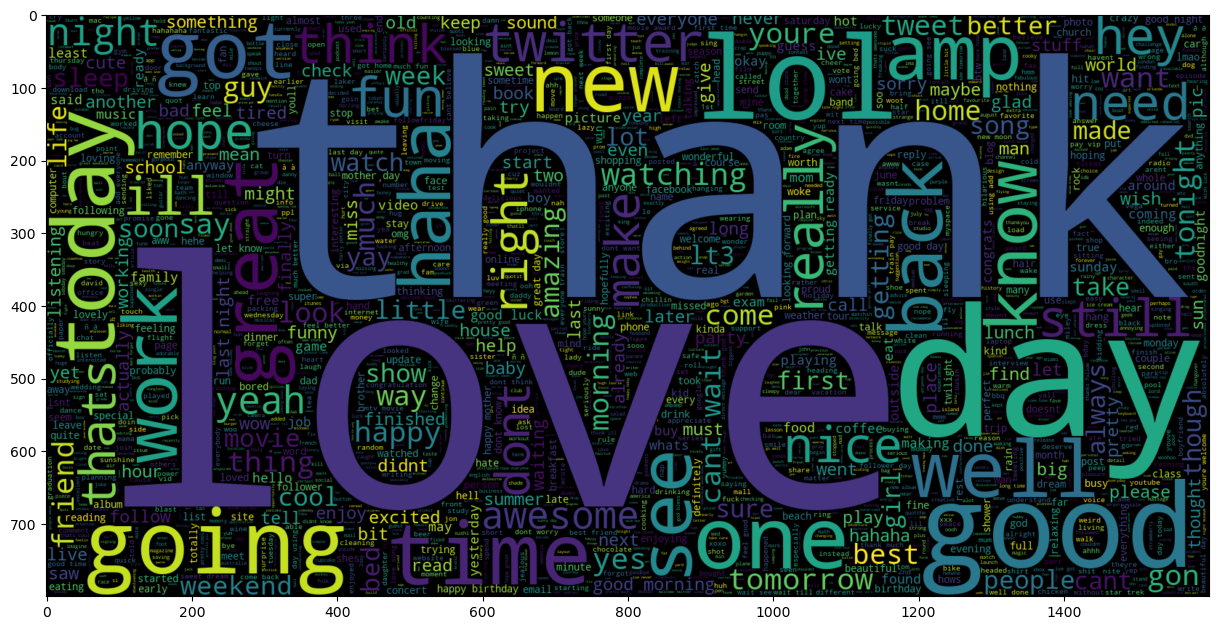

In [59]:
#show some positive words
plt.figure(figsize = (15,15))
word_cloud = WordCloud(max_words = 2000, width = 1600, 
                      height = 800).generate(" ".join(df[df.Label == 1].Cleaned_Text))

plt.imshow(word_cloud, interpolation = 'bilinear')   

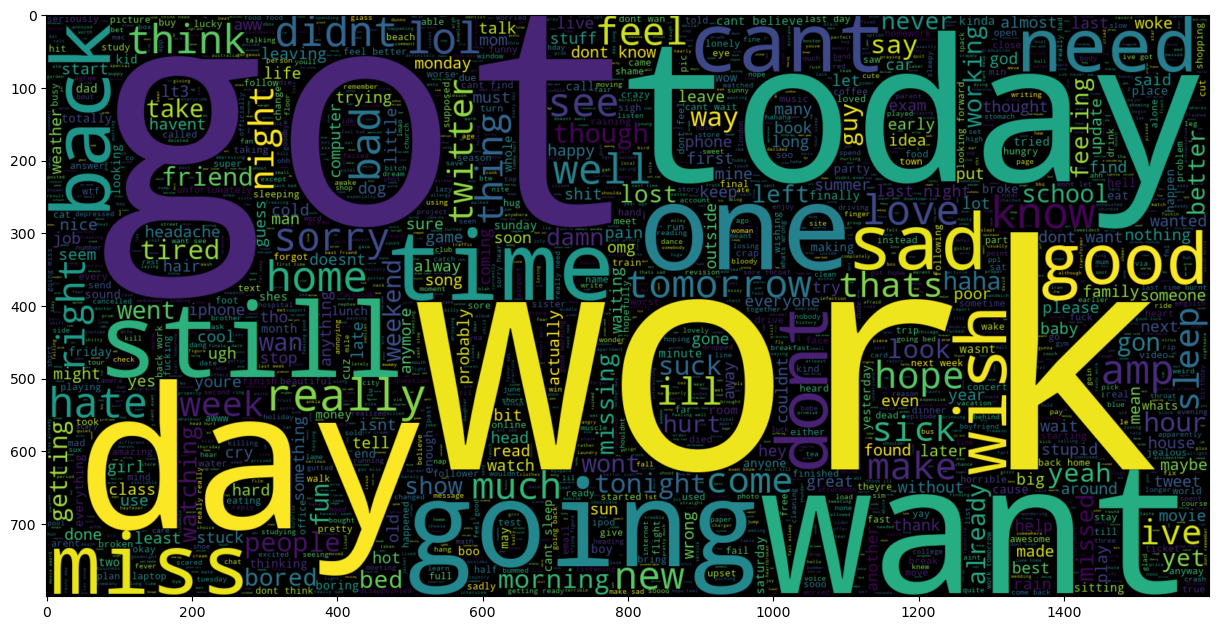

In [60]:
#show some negative words
plt.figure(figsize = (15,15))
word_cloud = WordCloud(max_words = 2000, width = 1600, 
                      height = 800).generate(" ".join(df[df.Label == 0].Cleaned_Text))

plt.imshow(word_cloud, interpolation = 'bilinear')

# Data Splitting

In [61]:
# split data into features x lable , y lable
x=df['Cleaned_Text'].values
y=df['Label'].values

In [62]:
print(x.shape)
print(y.shape)

(20000,)
(20000,)


# convert Text to Word Frequency 

In [65]:
vector = TfidfVectorizer()
x= vector.fit_transform(x)

In [66]:
x

<20000x21314 sparse matrix of type '<class 'numpy.float64'>'
	with 133395 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# RF Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(max_depth=50)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [73]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2979
           1       0.69      0.76      0.73      3021

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



# Save rf model

In [78]:
import pickle 
pickle.dump(rf, open('rf.pkl','wb'))

# Deep Learning Model

In [79]:
from keras.models import Sequential 
from keras.layers import *

In [82]:
model=Sequential ()
model.add(Embedding(input_dim=x_train.shape[1],output_dim=128))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics =['accuracy']
model.fit(x_train,y_train,batch_size=32,epochs=5,#validatin_data=(x_test,y_test))